In [20]:
import netCDF4 as nc
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import sys

import PlotTools.plot_tools as PTs

import iris
import iris.plot as iplt
import iris.quickplot as qplt

from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15.,10)

from iris_jules import jules


In [21]:
WFDEI_DIR='/users/eow/edwcom/BVOCs/JULES_OUTPUT/WFDEI_global/yearly/'
OUT_DIR=WFDEI_DIR+'plots/'
runids = ['J4.6_WFDEI_VG', 'J4.6_WFDEI_TRIFFID_VG'] #,\
          #'J4.6_WFDEI_VG_ECPmods',\
          #'J4.6_WFDEI_VG_ECPmods_tefld',\
          #'J4.6_WFDEI_VG_ECPmods_tefld_Guenther']

run_snames = ['std', 'triffid'] #,'ECPmods','tefld','GuentMods']
nRUNS=len(runids)
profile = 'monthly.2000'

year=2014

invars=['isoprene','terpene','acetone','methanol','gpp','lai','tstar_gb']

FRAC_file='/users/eow/edwcom/WFD_EI/J4.6_WFDEI_FRAC.monthly.nc'

PFT_names=['Broadleaf Tree','Needleleaf Tree','C3 Grass','C4 Grass','Shrub']


In [22]:
FRAC_constraint=iris.Constraint('Fractional cover of each surface type')
FRAC_cube=jules.load(FRAC_file,FRAC_constraint)[0]

AREA_constraint=iris.Constraint('Area of gridcell')
AREA_cube=jules.load(FRAC_file,AREA_constraint)[0][0,:]

PFT_frac_cube=FRAC_cube[0,:5,:,:]


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)
/users/eow/edwcom/code/PYTHON/iris_jules/jules.py:807: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  griddata[..., latind_int[gridpt], lonind_int[gridpt]] = data[..., gridpt]


In [23]:
#qplt.contourf(AREA_cube)


In [24]:

iso_constraint=iris.Constraint('PFT isoprene emission flux')
terp_constraint=iris.Constraint('PFT (mono-)terpene emission flux')
gpp_constraint=iris.Constraint('PFT gross primary productivity')
npp_constraint=iris.Constraint('PFT net primary productivity')


In [25]:
# Read the data into a dictionary as a cube
ISO_cubes={}
TERP_cubes={}
GPP_cubes={}
NPP_cubes={}
for runid in runids:
    J_fname=WFDEI_DIR+runid+'.'+profile+'.nc'
    print(J_fname)
    ISO_cubes[runid]=jules.load(J_fname,iso_constraint)[0]*PFT_frac_cube
    TERP_cubes[runid]=jules.load(J_fname,terp_constraint)[0]*PFT_frac_cube
    GPP_cubes[runid]=jules.load(J_fname,gpp_constraint)[0]*PFT_frac_cube
    NPP_cubes[runid]=jules.load(J_fname,npp_constraint)[0]*PFT_frac_cube


/users/eow/edwcom/BVOCs/JULES_OUTPUT/WFDEI_global/yearly/J4.6_WFDEI_VG.monthly.2000.nc


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)
/users/eow/edwcom/code/PYTHON/iris_jules/jules.py:807: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  griddata[..., latind_int[gridpt], lonind_int[gridpt]] = data[..., gridpt]


/users/eow/edwcom/BVOCs/JULES_OUTPUT/WFDEI_global/yearly/J4.6_WFDEI_TRIFFID_VG.monthly.2000.nc


In [66]:
# Calculate annual emissions in Tg yr-1
iPFT=0
ISO_AnnEmis_cubes={}
TERP_AnnEmis_cubes={}
GPP_AnnEmis_cubes={}
NPP_AnnEmis_cubes={}

for runid in runids:
    cube=ISO_cubes[runid].copy()
    AnnEmis=cube.collapsed('time',iris.analysis.MEAN)
    AnnEmis=AnnEmis*AREA_cube
    AnnEmis.convert_units('Tg yr-1')
    AnnEmis.long_name=runid
    ISO_AnnEmis_cubes[runid]=AnnEmis.copy()
    
    cube=TERP_cubes[runid].copy()
    AnnEmis=cube.collapsed('time',iris.analysis.MEAN)
    AnnEmis=AnnEmis*AREA_cube
    AnnEmis.convert_units('Tg yr-1')
    AnnEmis.long_name=runid
    TERP_AnnEmis_cubes[runid]=AnnEmis.copy()

    cube=GPP_cubes[runid].copy()
    AnnEmis=cube.collapsed('time',iris.analysis.MEAN)
    #AnnEmis=AnnEmis*AREA_cube
    AnnEmis.convert_units('g m-2 yr-1')
    AnnEmis.long_name=runid
    GPP_AnnEmis_cubes[runid]=AnnEmis.copy()
    
    cube=NPP_cubes[runid].copy()
    AnnEmis=cube.collapsed('time',iris.analysis.MEAN)
    #AnnEmis=AnnEmis*AREA_cube
    AnnEmis.convert_units('g m-2 yr-1')
    AnnEmis.long_name=runid
    NPP_AnnEmis_cubes[runid]=AnnEmis.copy()
    
    

/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/numpy/ma/core.py:812: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


In [54]:
lons_2d,lats_2d=np.meshgrid(AnnEmis.dim_coords[2].points,AnnEmis.dim_coords[1].points)

In [55]:
plot_DATALIST=[GPP_AnnEmis_cubes[runid][iPFT,:].data for runid in runids]
plot_LONSLIST=[lons_2d for runid in runids]
plot_LATSLIST=[lats_2d for runid in runids]
plot_titles=PLOT_TITLES=[runid.replace('_',' ') for runid in runids]
print(plot_titles)


['J4.6 WFDEI VG', 'J4.6 WFDEI TRIFFID VG']


In [56]:
print(lons_2d.shape)

(280, 720)


In [57]:
colormap=cm.get_cmap('brewer_YlGnBu_09',lut=250)
print(type(colormap))

colormap_r=PTs.reverse_colourmap(colormap,name='brewer_YlGnBu_09_r')
print(type(colormap_r))

<class 'matplotlib.colors.LinearSegmentedColormap'>
<class 'matplotlib.colors.LinearSegmentedColormap'>


In [58]:
print(GPP_AnnEmis_cubes[runid].data.shape)
print('%20s - %40s'%('', 'Global Annual Gross Primary Productivity (Pg)'))
print(('%20s - ' + nRUNS*'%15s ') % tuple(['PFT']+run_snames))

for iPFT in range(5):
    print(('%20s -'+nRUNS*'%15.3f ')%tuple([PFT_names[iPFT]]+ \
                                       [np.sum(GPP_AnnEmis_cubes[runid].data[iPFT,:]) \
                                        for runid in runids]))

print(('%20s -'+nRUNS*'%15.3f ')%tuple(['Total']+ \
                                    [np.sum(GPP_AnnEmis_cubes[runid].data) \
                                        for runid in runids]))

(5, 280, 720)
                     - Global Annual Gross Primary Productivity (Pg)
                 PFT -             std         triffid 
      Broadleaf Tree -      29195.843       26598.934 
     Needleleaf Tree -       4535.863        5478.636 
            C3 Grass -      20850.518       29239.250 
            C4 Grass -      10953.159       14639.936 
               Shrub -       2529.407        3924.586 
               Total -      68064.790       79881.342 


In [59]:
print(NPP_AnnEmis_cubes[runid].data.shape)
print('%20s - %40s'%('', 'Global Annual Net Primary Productivity (Pg)'))
print(('%20s - ' + nRUNS*'%15s ') % tuple(['PFT']+run_snames))

for iPFT in range(5):
    print(('%20s -'+nRUNS*'%15.3f ')%tuple([PFT_names[iPFT]]+ \
                                       [np.sum(NPP_AnnEmis_cubes[runid].data[iPFT,:]) \
                                        for runid in runids]))

print(('%20s -'+nRUNS*'%15.3f ')%tuple(['Total']+ \
                                    [np.sum(NPP_AnnEmis_cubes[runid].data) \
                                        for runid in runids]))

(5, 280, 720)
                     - Global Annual Net Primary Productivity (Pg)
                 PFT -             std         triffid 
      Broadleaf Tree -     -14578.398        3418.905 
     Needleleaf Tree -       1512.094        2714.536 
            C3 Grass -      -5937.627        7343.665 
            C4 Grass -       3692.240        7220.113 
               Shrub -        312.254        1595.344 
               Total -     -14999.437       22292.563 


In [60]:
print(ISO_AnnEmis_cubes[runid].data.shape)
print('%20s - %40s'%('', 'Global Annual Isoprene Emission (Tg)'))
print(('%20s - ' + nRUNS*'%15s ') % tuple(['PFT']+run_snames))
confactors=np.array([0.82,0.71,0.9,0.81,0.89])

for iPFT in range(5):
    print(('%20s -'+nRUNS*'%15.3f ')%tuple([PFT_names[iPFT]]+ \
                                       [np.sum(ISO_AnnEmis_cubes[runid].data[iPFT,:]) \
                                        for runid in runids]))#

print(('%20s -'+nRUNS*'%15.3f ')%tuple(['Total']+ \
                                    [np.sum(ISO_AnnEmis_cubes[runid].data) \
                                        for runid in runids]))

(5, 280, 720)
                     -     Global Annual Isoprene Emission (Tg)
                 PFT -             std         triffid 
      Broadleaf Tree -        216.249         215.395 
     Needleleaf Tree -         69.249          78.060 
            C3 Grass -         26.140          33.083 
            C4 Grass -         17.356          24.283 
               Shrub -          8.433          13.833 
               Total -        337.428         364.654 


In [61]:
import brewer2mpl

In [67]:
plot_DATALIST=[np.sum(GPP_AnnEmis_cubes[runid].data,axis=0) for runid in runids]
plot_LONSLIST=[lons_2d for runid in runids]
plot_LATSLIST=[lats_2d for runid in runids]
plot_titles=PLOT_TITLES=[runid.replace('_',' ') for runid in runids]
print(plot_titles)


['J4.6 WFDEI VG', 'J4.6 WFDEI TRIFFID VG']


In [70]:
#COLOURS=['darkblue','blue','powderblue','ivory','khaki','coral','darkred']
CMAP=brewer2mpl.get_map('YlBu','Sequential','5',reverse=True).get_mpl_colormap(N=20,gamma=0.6)
PTs.plot_map_multi(plot_DATALIST,plot_LONSLIST,plot_LATSLIST,\
                   Ncols=1,Nrows=2, FIGSIZE=(20,10), \
                   COMMON_CBAR=True, FONTSIZE=30, \
                   RESOLUTION='c', SUPTITLE='Annual GPP', \
                   #INTERPOLATE_COLOURS=True, COLOURS=COLOURS,NLEVELS=250,\
                   CMAP='jet',NLEVELS=20, \
                   #MPL_CBAR='brewer_YlGnBu_09',NLEVELS=250,\
                   LATDEL=30,LONDEL=30, LON_RANGE=[-180,180],LAT_RANGE=[-60,90], \
                   #DATA_RANGE=[0,0.2], \
                   FONTSIZES=[15,15,18,18], \
                   PLOT_TITLES=plot_titles, \
                   fraction=0.07, \
                  )



ValueError: Invalid color map name 'YlBu' for type 'Sequential'.
Valid names are: ['Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']

In [ ]:
plot_DATALIST=[ISO_AnnEmis_cubes[runid].collapsed('pft',iris.analysis.SUM).data for runid in runids]

PTs.plot_map_multi(plot_DATALIST,plot_LONSLIST,plot_LATSLIST,   \
                   Ncols=2,Nrows=2, FIGSIZE=(20,10),            \
                   COMMON_CBAR=True, FONTSIZE=30, fraction=0.07, \
                   SUPTITLE='Annual Isoprene Emissions - Total' ,\
                   CMAP=CMAP,NLEVELS=250, \
                   LATDEL=30,LONDEL=30, LON_RANGE=[-180,180],LAT_RANGE=[-60,90], \
                   DATA_RANGE=[0,0.2], RESOLUTION='c', FONTSIZES=[15,15,18,18], \
                   PLOT_TITLES=plot_titles,CBAR_LABEL='Isoprene TgC')#, \
                   #FILE_PLOT=OUT_DIR+'Global_Isoprene_Emissions_Total_'+year+'.png',
                  #)




/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/numpy/ma/core.py:812: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


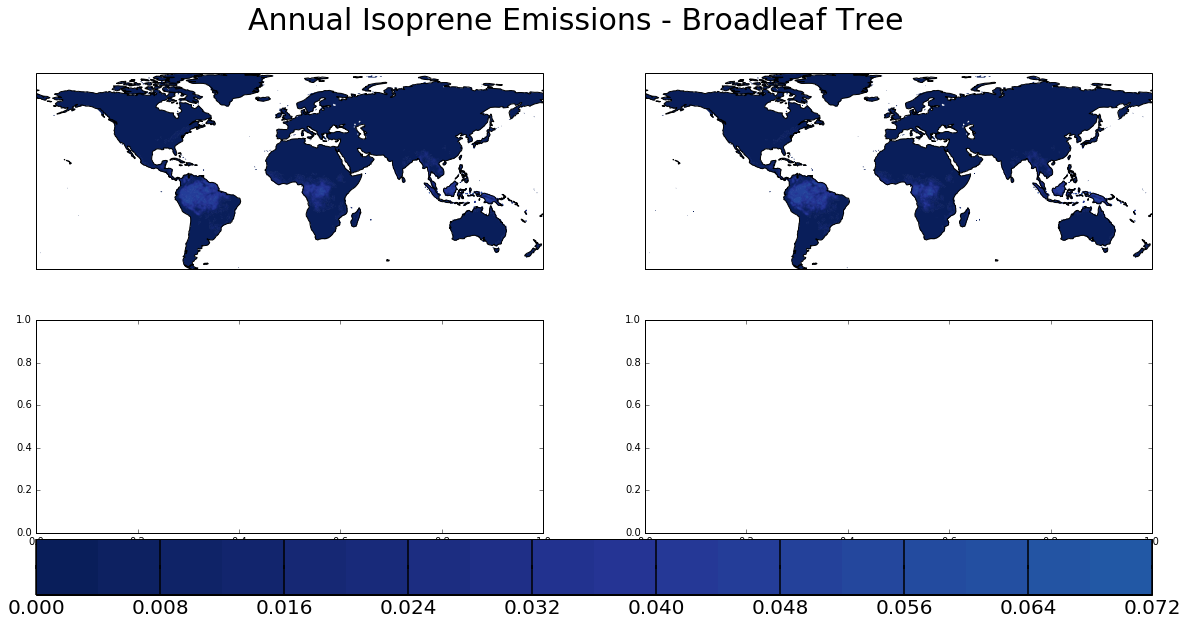

In [12]:

for iPFT in range(1):
    FIG,AXES=plt.subplots( ncols=2, nrows=2, figsize=(20,10) )
    for runid,AX in zip(runids,AXES.flatten()):
        plt.sca(AX)
        cube=ISO_cubes[runid].copy()
    
        AnnEmis = cube.collapsed('time',iris.analysis.MEAN)[iPFT,:]
        AnnEmis = AnnEmis*AREA_cube
        AnnEmis.convert_units('Tg yr-1')
        AnnEmis.long_name=runid
        
        im=iplt.contourf(AnnEmis,20,cmap='YlGnBu_r',vmax=0.3,vmin=0)
        AX.set_title(runid,fontsize=20)
        plt.gca().coastlines()
        
    
    CBAR=plt.colorbar(im,ax=AXES.flatten().tolist(),orientation='horizontal',pad=15)
    CBAR.ax.axhline(linewidth=2,color='black')
    CBAR.ax.axhline(y=1,linewidth=2,color='black')
    CBAR.ax.xaxis.set_tick_params(length=30,bottom=True,top=True,\
                                  width=1.5,labelsize=20)
    FIG.subplots_adjust(bottom=0.25)
    FIG.suptitle('Annual Isoprene Emissions - '+PFT_names[iPFT],fontsize=30)
    plt.show()
    

In [ ]:
plotdata=[ISO_AnnEmis_cubes[runid][iPFT,:].data for runid in runids]

print(len(plotdata))
print(plotdata[0].shape)
#print(AnnEmis.shape)
          

In [ ]:
PTs.plot_map(ISO_AnnEmis_cubes['J4.6_WFDEI_VG'][0,:].data,lons_2d,lats_2d)

In [ ]:
#cube_slice=cube[0,:,:]
#cube_slice.shape
AnnEmis = cube.collapsed('time',iris.analysis.SUM)
for iPFT in range(5):
    qplt.contourf(AnnEmis[iPFT,:])
    plt.gca().coastlines()
    plt.show()

In [ ]:
contour=qplt.contourf(cube_slice)
plt.gca().coastlines()